In [1]:
import sys
import os
import time
import pandas as pd
# Importing the main code.
module_path = os.path.abspath(os.path.join('../src/ocloc'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ocloc import ProcessingParameters, ClockDrift

In [2]:
# Parameters for locating the files where the correlation files and station 
# information is contained.
path2data_dir = "/Users/localadmin/Dropbox/GitHub/ocloc_data_LAND/land_data"
# path2data_dir = "/Users/localadmin/Dropbox/GitHub/ocloc/tutorials/correlations_O20"
station_file = "/Users/localadmin/Dropbox/GitHub/ocloc/tutorials/metadata/station_file_only_land.txt"
reference_time = '2014-08-21T00:00:00.000000Z'

In [22]:
params2 = ProcessingParameters(
                 freqmin = 0.2, # Low freq. for the bandpass filter
                 freqmax = 0.4, # High freq. for the bandpass filter 
                 ref_vel = 4500, # m/s
                 dist_trh = 2.0, # Minimum station separation in terms of wavelength
                 snr_trh = 30, # Signal-to-noise ratio threshold
                 noise_st = 240, # start of the noise window.
                 dt_err = 0.004, # Sampling interval needs to be multiple of this value.
                 resp_details = False)

cd = ClockDrift(station_file, path2data_dir, 
                  reference_time = '2014-08-21T00:00:00.000000Z',
                  list_of_processing_parameters=[params2])#, params3])
        
        
cd.calculate_aprioridt_4_allcorrelations()
cd.calculate_dt_ins()
cd.calculate_tapp_4_allcorrelations()
cd.filter_stations(min_number_of_total_correlations=4,
                   min_number_correlation_periods=3,
                   min_number_of_stationconnections=3,
                   days_apart=60)
cd.build_matrices()
cd.solve_eq()

for i in range(3):
    cd.calculate_tapp_4_allcorrelations()
    cd.calculate_dt_ins()
    cd.remove_outiers(max_error=1.)
    cd.calculate_dt_ins()
    cd.filter_stations(min_number_of_total_correlations=4,
                       min_number_correlation_periods=3,
                       min_number_of_stationconnections=3,
                       days_apart=60)
    cd.build_matrices()
    cd.solve_eq()

Calculating the apriori estimates for each stationpair
Calculating the t_app for each stationpair.
Station  BER does not exceed the min_number_of_stationconnections
Station  EIN does not exceed the min_number_of_stationconnections
Station  GEV does not exceed the min_number_of_stationconnections
Station  HAH does not exceed the min_number_of_stationconnections
Station  LFE does not exceed the min_number_of_stationconnections
Station  PAT does not exceed the min. no. of correlation.
Station  PAT does not exceed the min. no. of correlation periods.
Station  PAT does not exceed the min_number_of_stationconnections
Station  PRE does not exceed the min_number_of_stationconnections
Station  RAH does not exceed the min_number_of_stationconnections
Station  SDV does not exceed the min_number_of_stationconnections
Station  SKG does not exceed the min. no. of correlation.
Station  SKG does not exceed the min. no. of correlation periods.
Station  SKG does not exceed the min_number_of_stationconne

Station  NEW does not exceed the min. no. of correlation.
Station  NEW does not exceed the min. no. of correlation periods.
Station  NEW does not exceed the min_number_of_stationconnections
Station  HOP does not exceed the min. no. of correlation.
Station  HOP does not exceed the min. no. of correlation periods.
Station  HOP does not exceed the min_number_of_stationconnections
Station  KHR does not exceed the min_number_of_stationconnections
Station  STF does not exceed the min_number_of_stationconnections
No t_app found for Station: BER
No t_app found for Station: EIN
No t_app found for Station: GEV
No t_app found for Station: HAH
No t_app found for Station: LFE
No t_app found for Station: PAT
No t_app found for Station: PRE
No t_app found for Station: RAH
No t_app found for Station: SDV
No t_app found for Station: SKG
No t_app found for Station: SKH
No t_app found for Station: SUH
No t_app found for Station: NEW
No t_app found for Station: HOP
No t_app found for Station: KHR
No t_app

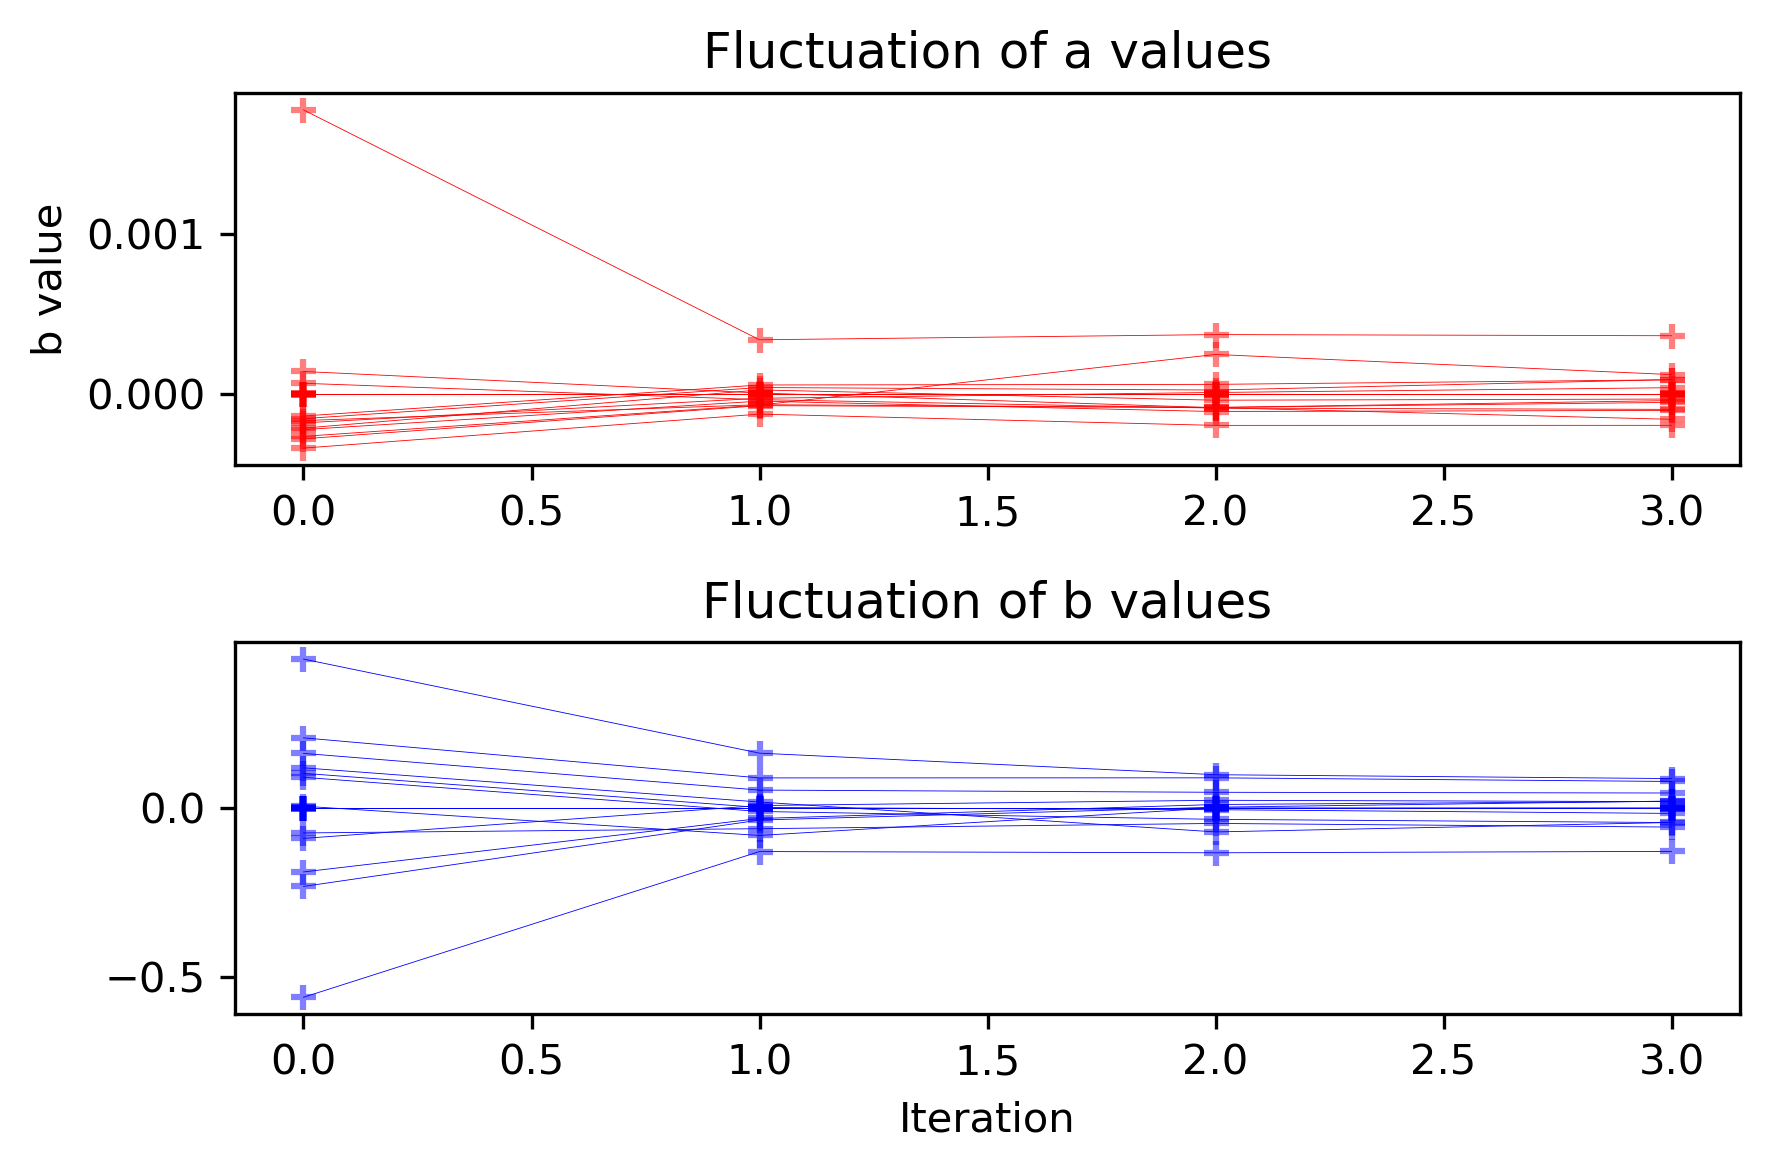

In [23]:
cd.plot_fluctuation_of_a_and_b()

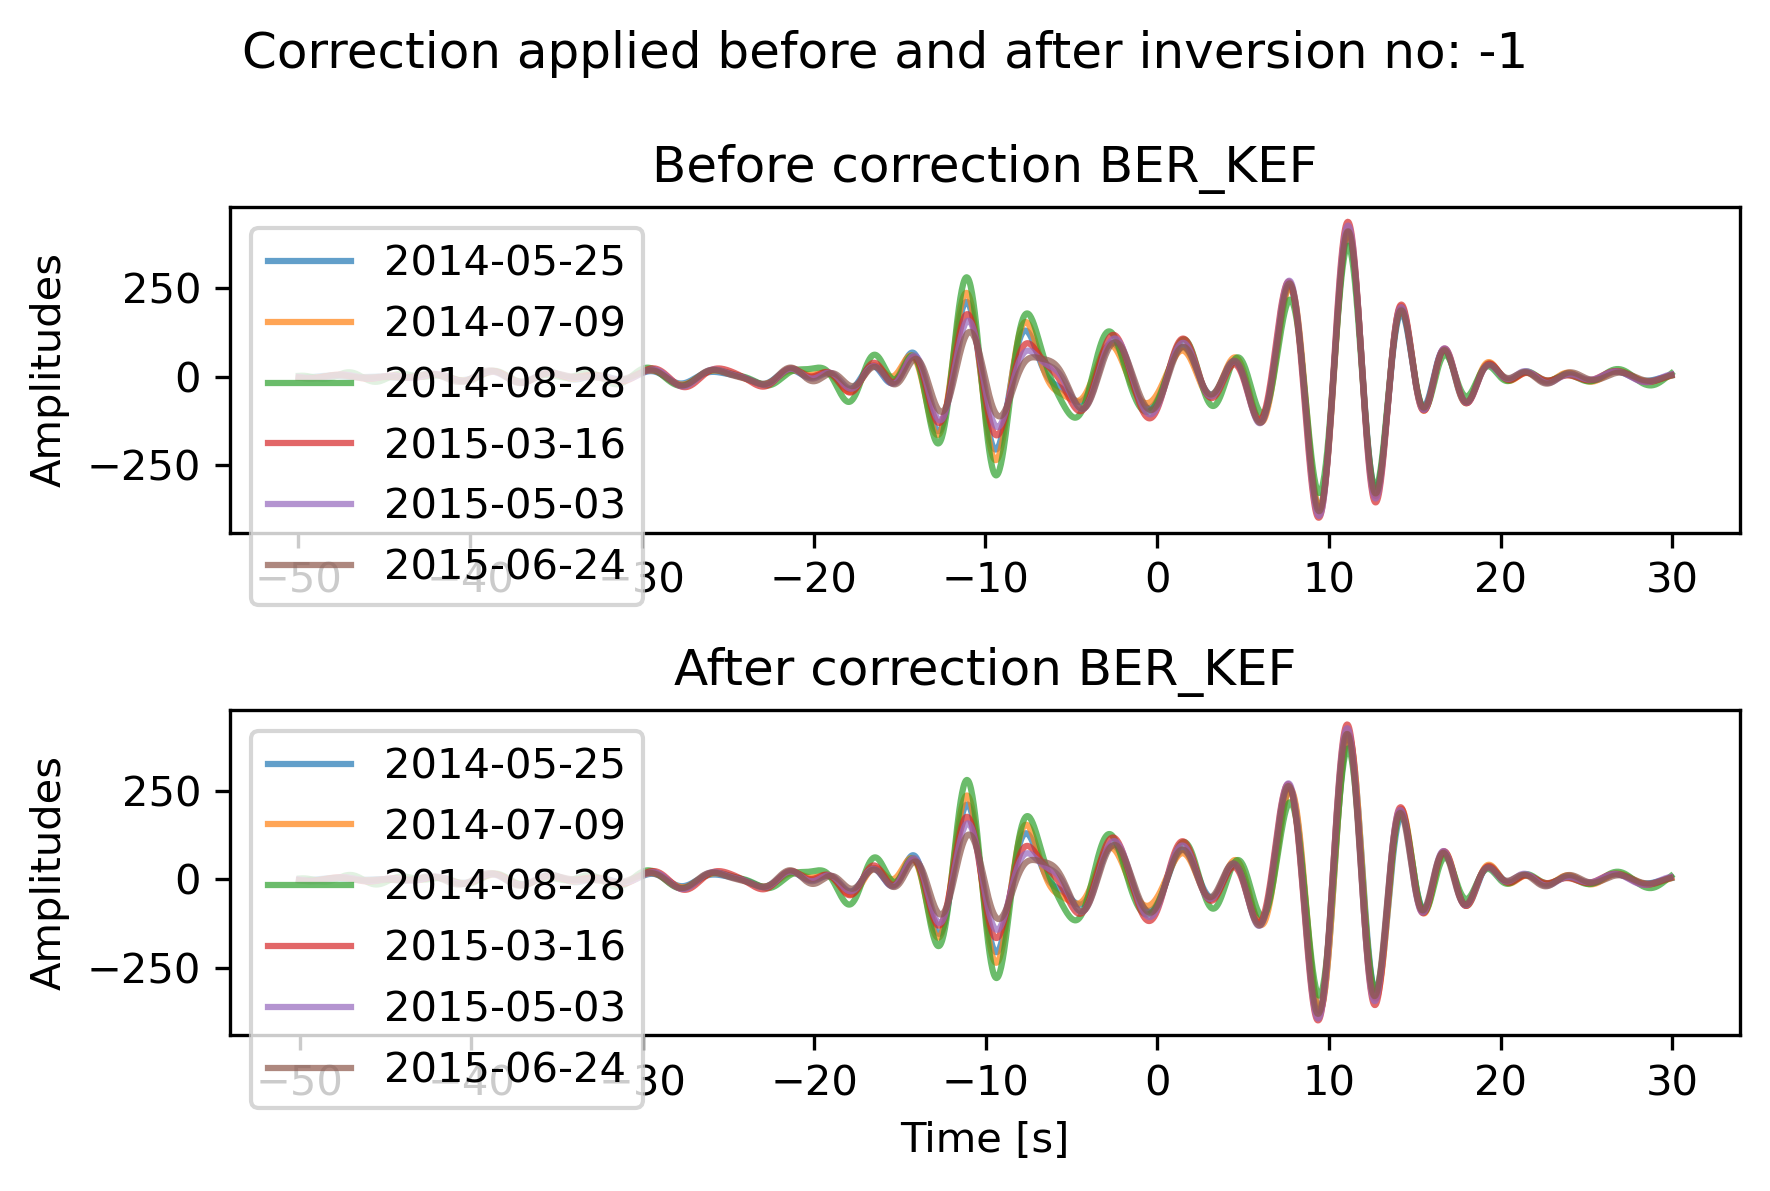

In [24]:
station1_code, station2_code = "O01", "KEF"
for sta in cd.stations:
    if sta.needs_correction:
        cd.plot_correlation_beforeNafter_correction(sta.code, station2_code)
        break

f = open("/Users/localadmin/Dropbox/GitHub/ocloc/tutorials/bootstrap/"
         + "clockdrift.obj", "wb")
pickle.dump(cd, f)
f.close()

In [25]:
corrected_stations = []
clock_drift_per_day = []
for station in cd.stations:
    if station.needs_correction:
        try:
            a = float(cd.solution["a ("+ station.code + ")"])
        except:
            continue
        clock_drift_per_day.append(a*365)
        corrected_stations.append(station.code)
final_results = pd.DataFrame(list(zip(corrected_stations,
                                      clock_drift_per_day)),
                             columns = ["Sensor code",
                                        "Clock drift [s/year]"])
display(final_results)

,Sensor code,Clock drift [s/year]
0,HAS,0.032187
1,HOS,-0.015818
2,KEF,-0.072546
3,KUG,-0.036018
4,ONG,-0.058753
5,RAR,0.043658
6,RET,-0.012354
7,STA,0.031728
8,KRV,-0.038349
9,SKF,0.013621
